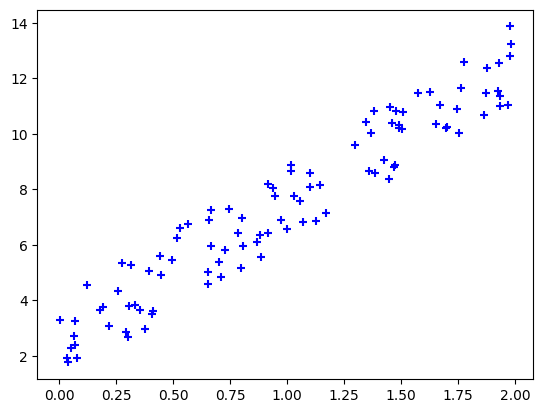

In [427]:
import numpy as np
import matplotlib.pyplot as plt

# 数据准备

np.random.seed(56)
x = 2 * np.random.rand(100,1)
y = 1 + 5 * x + np.random.rand(100,1) * 3

plt.scatter(x,y,marker='+',c='blue')



In [428]:
#数据处理
import torch
from torch.utils.data import DataLoader  # 输入数据和相应标签数据打包为一个数据集对象
from torch.utils.data import TensorDataset   # 加载并预处理数据，同时定义数据采样方式、批量大小

x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()

dataset = TensorDataset(x,y)

dataloder = DataLoader(dataset,batch_size=16,shuffle=True)

In [429]:
for index,(data,label) in enumerate(dataloder):
    print(f'index:{index},len:{len(data)}')
    print(data)
    print(label)

index:0,len:16
tensor([[0.3307],
        [1.4253],
        [1.7744],
        [0.7287],
        [0.3055],
        [0.6556],
        [1.1446],
        [0.6995],
        [1.9270],
        [0.2922],
        [0.4957],
        [0.0660],
        [0.7833],
        [0.4136],
        [0.0713],
        [0.8064]])
tensor([[ 3.8151],
        [ 9.0445],
        [12.6017],
        [ 5.8032],
        [ 3.8056],
        [ 6.9003],
        [ 8.1472],
        [ 5.3892],
        [12.5698],
        [ 2.8732],
        [ 5.4495],
        [ 2.7319],
        [ 6.4255],
        [ 3.6279],
        [ 2.3821],
        [ 5.9645]])
index:1,len:16
tensor([[0.9172],
        [1.9243],
        [1.6526],
        [0.0033],
        [0.5306],
        [1.5722],
        [1.9329],
        [0.6668],
        [0.4441],
        [1.1004],
        [0.8839],
        [0.3015],
        [0.7443],
        [0.1225],
        [1.4914],
        [0.9749]])
tensor([[ 8.1769],
        [11.5374],
        [10.3621],
        [ 3.2849],
        [ 6

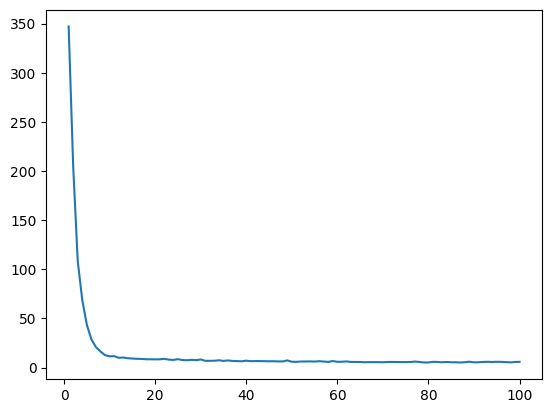

In [430]:
epoch = 100
lr = 0.01
w = torch.randn(1,requires_grad=True)
b = torch.randn(1,requires_grad=True)
Loss = []
for e in range(epoch): # 迭代
    sum_loss = 0 # 代价
    for batch_id,(bx,by) in enumerate(dataloder):
        h = w * bx + b
        loss = torch.mean((by-h)**2) # 代价函数
        sum_loss += loss # 计算每次迭代的代价函数
        loss.backward()
        # 更新参数
        w.data -= lr * w.grad.data
        b.data -= lr * b.grad.data
        # 梯度清零
        w.grad.zero_()
        b.grad.zero_()
    Loss.append(sum_loss.detach())
# plt.scatter(x,y)
L_x = [i for i in range(1,epoch+1)]
plt.plot(L_x,Loss)
plt.show()

[tensor(448.2709), tensor(402.5092), tensor(399.0574), tensor(375.9994), tensor(335.1739), tensor(317.2200), tensor(303.8040), tensor(303.2004), tensor(269.8440), tensor(260.1194), tensor(253.1721), tensor(222.4875), tensor(222.6366), tensor(201.8002), tensor(195.6506), tensor(179.1447), tensor(173.1967), tensor(156.4368), tensor(150.6575), tensor(151.2927), tensor(135.5110), tensor(126.8755), tensor(118.4781), tensor(110.2260), tensor(106.0678), tensor(103.7032), tensor(93.7200), tensor(87.0086), tensor(83.4735), tensor(80.6179), tensor(73.7255), tensor(71.9148), tensor(68.1081), tensor(62.8683), tensor(60.8061), tensor(58.6199), tensor(56.4944), tensor(55.3374), tensor(47.8829), tensor(44.4366), tensor(45.6233), tensor(45.1203), tensor(39.0655), tensor(39.5492), tensor(35.6374), tensor(37.2242), tensor(33.8559), tensor(31.9389), tensor(28.7076), tensor(29.7488), tensor(28.1161), tensor(25.6721), tensor(24.3319), tensor(24.6862), tensor(22.6338), tensor(23.3078), tensor(21.0430), tens

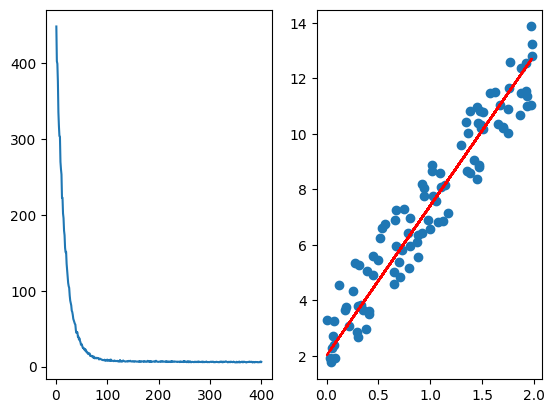

In [431]:
epoch = 400
lr = 0.001
w = torch.randn(1,requires_grad=True).float()
b = torch.randn(1,requires_grad=True).float()
Loss = []

for time in range(1,epoch+1):
    
    sum_cost = 0

    for index,(bx,by) in enumerate(dataloder):
        h = w * bx + b
        cost = torch.mean((by-h)**2)
        sum_cost += cost
        cost.backward()
        
        w.data -= lr * w.grad.data
        b.data -= lr * b.grad.data

        w.grad.zero_()
        b.grad.zero_()

    Loss.append(sum_cost.detach())
    
print(Loss)
L_x = [i for i in range(1,len(Loss)+1)]
plt.subplot(1,2,1)
plt.plot(L_x,Loss)
plt.subplot(1,2,2)
plt.scatter(x,y)
plt.plot(x,w.detach()*x+b.detach(),color='red')

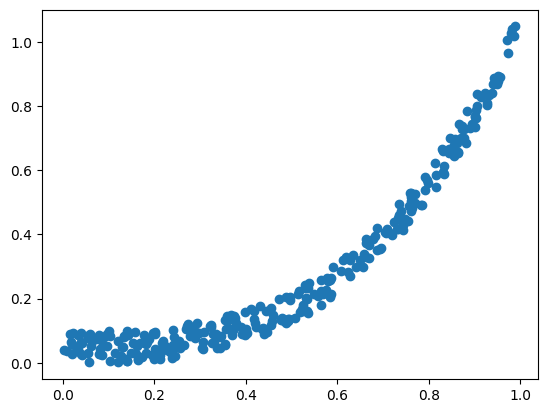

In [432]:
# from math import *

x = np.random.rand(300,1)
y = x**3 + np.random.rand(300,1)*0.1

plt.scatter(x,y)

In [433]:
# 数据准备
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()
x *= 2

dataset = TensorDataset(x,y)
dataloder = DataLoader(dataset,batch_size=10,shuffle=True)
type(x)

torch.Tensor

In [444]:
w1 = torch.rand(1,requires_grad=True)
w2 = torch.rand(1,requires_grad=True)
w3 = torch.rand(1,requires_grad=True)
w4 = torch.rand(1,requires_grad=True)
b = torch.rand(1,requires_grad=True)
Loss = []
epoch = 300
lr = 0.0001
print(w1)

for time in range(epoch):
    sum_cost = 0
    for index,(bx,by) in enumerate(dataloder):
        print(w1)
        h = w3*bx**3 + w2*bx**2 +w1*bx**1 + b      
        cost = torch.mean((by-h)**2)
        cost.backward()
        # w4.data -= lr * w4.grad.data
        w3.data -= lr * w3.grad.data
        w2.data -= lr * w2.grad.data
        w1.data -= lr * w1.grad.data
        b.data -= lr * b.grad.data

        b.grad.zero_()
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()

        sum_cost += cost
    # print(w1)
    
    Loss.append(sum_cost.detach())


tensor([0.4791], requires_grad=True)
tensor([0.4791], requires_grad=True)
tensor([0.4787], requires_grad=True)
tensor([0.4782], requires_grad=True)
tensor([0.4770], requires_grad=True)
tensor([0.4762], requires_grad=True)
tensor([0.4759], requires_grad=True)
tensor([0.4754], requires_grad=True)
tensor([0.4748], requires_grad=True)
tensor([0.4740], requires_grad=True)
tensor([0.4735], requires_grad=True)
tensor([0.4729], requires_grad=True)
tensor([0.4722], requires_grad=True)
tensor([0.4719], requires_grad=True)
tensor([0.4711], requires_grad=True)
tensor([0.4706], requires_grad=True)
tensor([0.4701], requires_grad=True)
tensor([0.4699], requires_grad=True)
tensor([0.4694], requires_grad=True)
tensor([0.4688], requires_grad=True)
tensor([0.4686], requires_grad=True)
tensor([0.4681], requires_grad=True)
tensor([0.4677], requires_grad=True)
tensor([0.4671], requires_grad=True)
tensor([0.4662], requires_grad=True)
tensor([0.4655], requires_grad=True)
tensor([0.4650], requires_grad=True)
t

Text(0.5, 1.0, 'cost')

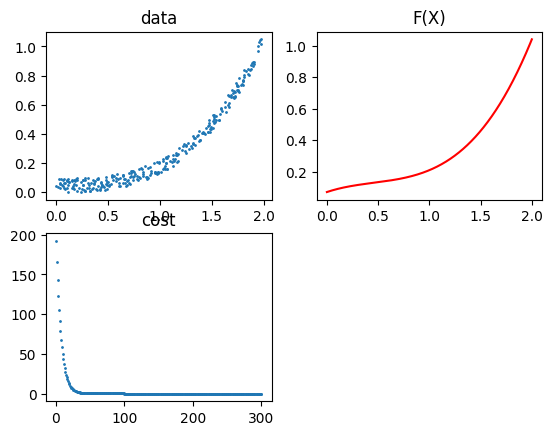

In [446]:
plt.subplot(2,2,1)
plt.scatter(x,y,s=1)
plt.title('data')
plt.subplot(2,2,2)
xx = np.linspace(0,2,1000)
plt.plot(xx,w3.detach()*xx**3 + w2.detach()*xx**2 +w1.detach()*xx + b.detach(),color='red')
# plt.scatter(x,w3.detach()*x**3 + w2.detach()*x**2 +w1.detach()*x + b.detach(),color='red')
plt.title('F(X)')
plt.subplot(2,2,3)
Loss_x = [i for i in range(1,len(Loss)+1)]
plt.scatter(Loss_x,Loss,s=1)
plt.title('cost')

In [436]:
type(x)

torch.Tensor

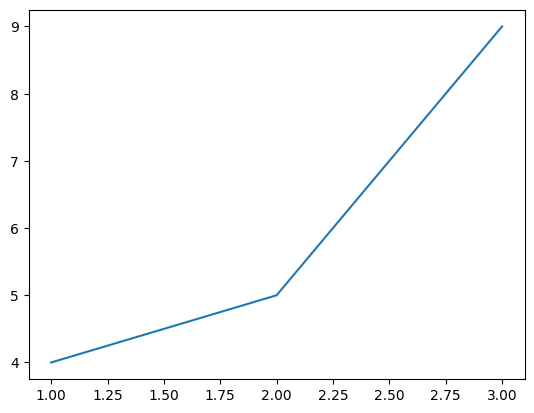

In [437]:
a = [1,2,3]
b = [4,5,9]
plt.plot(a,b)
plt.show()